<a href="https://colab.research.google.com/github/BrittonWinterrose/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [1]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [2]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [3]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


In [4]:
t1.std()**2

1.6666666666666665

![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [5]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

In [6]:
# TODO - during class, but please help!
survey_data = [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
               0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
               1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]

import numpy as np
import pandas as pd

df = pd.DataFrame(survey_data)
df.describe()

,0
count,50.000000
mean,0.660000
std,0.478518
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


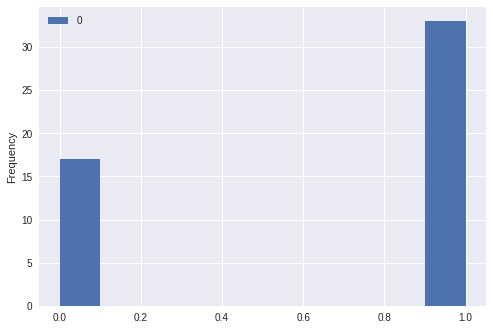

In [7]:
df.plot.hist()

In [8]:
# Now with confidence!

import scipy
scipy.stats.ttest_1samp(survey_data, 0.5)

Ttest_1sampResult(statistic=2.364321853156195, pvalue=0.02207003200903075)

In [9]:
# the t-statistic is the ratio of the departure of the estimated value of  a
# parameter from its hypothesized value to its standard error

# We want to calculate: tstat = 2.364321853156195

sample_stderr = 0.478518 / np.sqrt(len(survey_data))
sample_mean = 0.660000
null_hypothesis_mean = 0.5

t_stat = (sample_mean - null_hypothesis_mean) / sample_stderr
print(t_stat)

2.364322449518046


In [10]:
len(survey_data)

50

In [0]:
# Science! Reproducibility...
import random

def make_soda_data(n=50):
  # Fair version
  # return pd.DataFrame([random.randint(0, 1) for _ in range(n)])
  # Unfair version!
  return pd.DataFrame(np.random.binomial(n=1, p=0.5, size=n))

In [12]:
make_soda_data(n=500).describe()

,0
count,500.000000
mean,0.468000
std,0.499475
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [13]:
t_statistics = []
p_values = []
n_experiments = 10  # Number of visitors

for _ in range(n_experiments):
  df = make_soda_data(n=500000)
  ttest = scipy.stats.ttest_1samp(df, 0.5)
  t_statistics.append(ttest.statistic)
  p_values.append(ttest.pvalue)

pd.DataFrame(t_statistics).describe()

,0
count,10.000000
mean,0.257953
std,1.021237
min,-1.391587
25%,-0.346482
50%,0.688722
75%,0.983586
max,1.487754


In [14]:
pd.DataFrame(p_values).describe()

,0
count,10.000000
mean,0.395786
std,0.232763
min,0.136816
25%,0.214401
50%,0.347103
75%,0.540273
max,0.810008


In [15]:
random.choice([0, 1, 1])  # Unfair coins

1

In [16]:
np.random.binomial(100, 0.7)

68

In [17]:
np.random.binomial(1, 0.6)

1

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
#!pip install quilt
#!quilt install ResidentMario/missingno_data

In [29]:
# datasource 
data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# create headers
head = ['class_name','handicapped_infants', 'water_project_cost_sharing',
        'adoption_of_the_budget_resolution', 'physician_fee_freeze',
        'el_salvador_aid', 'religious_groups_in_schools', 
        'anti_satelite_test_ban', 'aid_to_nicaraguan_contras', 'mx_missile', 
        'immigration', 'synfuels_corporation_cutback', 'education_spending',
        'superfund_right_to_sue', 'crime', 'duty_free_exports', 
        'export_administration_act_south_africa']

df = pd.read_csv(data, names=head)
df.head()

,class_name,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satelite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [42]:
# Check what values are in each column
df.apply(pd.Series.value_counts).T

,?,democrat,n,republican,y
class_name,NaN,267.0,NaN,168.0,NaN
handicapped_infants,12.0,NaN,236.0,NaN,187.0
water_project_cost_sharing,48.0,NaN,192.0,NaN,195.0
adoption_of_the_budget_resolution,11.0,NaN,171.0,NaN,253.0
physician_fee_freeze,11.0,NaN,247.0,NaN,177.0
el_salvador_aid,15.0,NaN,208.0,NaN,212.0
religious_groups_in_schools,11.0,NaN,152.0,NaN,272.0
anti_satelite_test_ban,14.0,NaN,182.0,NaN,239.0
aid_to_nicaraguan_contras,15.0,NaN,178.0,NaN,242.0
mx_missile,22.0,NaN,206.0,NaN,207.0


In [88]:
# Lets compare value counts grouped by class name
gb = df.groupby(['class_name'])
gb<TAB>


SyntaxError: ignored

In [53]:
df_nans = df.replace(r'\?+', np.nan, regex=True)
df_nans = df_nans.replace('y', 1)
df_nans = df_nans.replace('n', 0)
df_nans.apply(pd.Series.value_counts).T

/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/api.py:87: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


,democrat,republican,0.0,1.0
class_name,267.0,168.0,NaN,NaN
handicapped_infants,NaN,NaN,236.0,187.0
water_project_cost_sharing,NaN,NaN,192.0,195.0
adoption_of_the_budget_resolution,NaN,NaN,171.0,253.0
physician_fee_freeze,NaN,NaN,247.0,177.0
el_salvador_aid,NaN,NaN,208.0,212.0
religious_groups_in_schools,NaN,NaN,152.0,272.0
anti_satelite_test_ban,NaN,NaN,182.0,239.0
aid_to_nicaraguan_contras,NaN,NaN,178.0,242.0
mx_missile,NaN,NaN,206.0,207.0


In [57]:
df_nans = df_nans.replace('y', 1)
df_nans = df_nans.replace('n', 0)
df_nans.isnull().sum()

class_name                                  0
handicapped_infants                        12
water_project_cost_sharing                 48
adoption_of_the_budget_resolution          11
physician_fee_freeze                       11
el_salvador_aid                            15
religious_groups_in_schools                11
anti_satelite_test_ban                     14
aid_to_nicaraguan_contras                  15
mx_missile                                 22
immigration                                 7
synfuels_corporation_cutback               21
education_spending                         31
superfund_right_to_sue                     25
crime                                      17
duty_free_exports                          28
export_administration_act_south_africa    104
dtype: int64

In [0]:
# So lets think about these missing values.
# First off, why are there missing values in this data set? 
# This data set is the voting record for some politicians.

"""   The CQA lists nine different types of votes: voted for, paired
      for, and announced for (these three simplified to yea), voted
      against, paired against, and announced against (these three
      simplified to nay), voted present, voted present to avoid conflict
      of interest, and did not vote or otherwise make a position known
      (these three simplified to an unknown disposition).
      """
# So our missing values originate from abstaining to vote,
# avoiding conflict of interest, or did not vote. 

In [54]:
df_nans.describe()

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satelite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
count,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
